In [11]:
width = 299
height = 299
channels = 3

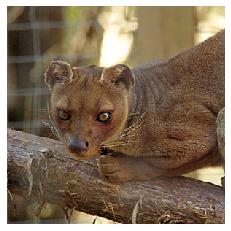

In [54]:
import matplotlib.image as mpimg
import os 
import matplotlib.pyplot as plt

test_image = mpimg.imread(os.path.join("images","fossa.jpg"))[:height,:width,:channels]
plt.imshow(test_image)
plt.axis("off")
plt.show()

In [56]:
test_image = 2 * test_image -1

In [57]:
print(test_image.shape)
test_image.reshape(-1,299,299,3)
test_image.shape

(299, 299, 3)


(299, 299, 3)

### Downloading the inception v3 model

In [10]:
import sys
import tarfile
from six.moves import urllib

TF_MODELS_URL = "http://download.tensorflow.org/models"
INCEPTION_V3_URL = TF_MODELS_URL + "/inception_v3_2016_08_28.tar.gz"
INCEPTION_PATH = os.path.join("datasets", "inception")
INCEPTION_V3_CHECKPOINT_PATH = os.path.join(INCEPTION_PATH,"inception_v3.ckpt")

def download_progress(count, block_size, total_size):
    percent = count * block_size * 100 // total_size
    sys.stdout.write("Downloading: {}%".format(percent))
    sys.stdout.flush()

def fetch_pretrained_inception_v3(url=INCEPTION_V3_URL, path=INCEPTION_PATH ):
    if os.path.exists(INCEPTION_V3_CHECKPOINT_PATH):
        return
    os.makedirs(path, exist_ok = True)
    tgz_path = os.path.join(path, "inception_v3.tgz")
    urllib.request.urlretrieve(url, tgz_path,reporthook=download_progress)
    inception_tgz = tarfile.open(tgz_path)
    inception_tgz.extractall(path=path)
    inception_tgz.close()
    os.remove(tgz_path)

In [11]:
fetch_pretrained_inception_v3()

Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloadin

Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloadin

Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloadin

Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Download

Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Download

Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Download

Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 25%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Download

Downloading: 29%Downloading: 29%Downloading: 29%Downloading: 29%Downloading: 29%Downloading: 29%Downloading: 29%Downloading: 29%Downloading: 29%Downloading: 29%Downloading: 29%Downloading: 29%Downloading: 29%Downloading: 29%Downloading: 29%Downloading: 29%Downloading: 29%Downloading: 29%Downloading: 29%Downloading: 29%Downloading: 29%Downloading: 29%Downloading: 29%Downloading: 29%Downloading: 29%Downloading: 29%Downloading: 29%Downloading: 29%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Download

Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Downloading: 34%Download

Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Downloading: 38%Download

Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Download

Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Download

Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 51%Downloading: 51%Downloading: 51%Downloading: 51%Downloading: 51%Downloading: 51%Downloading: 51%Downloading: 51%Downloading: 51%Downloading: 51%Downloading: 51%Downloading: 51%Downloading: 51%Download

Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Download

Downloading: 58%Downloading: 58%Downloading: 58%Downloading: 58%Downloading: 58%Downloading: 58%Downloading: 58%Downloading: 58%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Download

Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Download

Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Downloading: 67%Download

Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Download

Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 76%Downloading: 76%Downloading: 76%Downloading: 76%Downloading: 76%Downloading: 76%Downloading: 76%Downloading: 76%Downloading: 76%Downloading: 76%Downloading: 76%Downloading: 76%Download

Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Downloading: 80%Download

Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Download

Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Downloading: 88%Download

Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Downloading: 92%Download

Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Downloading: 96%Download

In [12]:
import re

CLASS_NAME_REGEX = re.compile(r"^n\d+\s+(.*)\s*$", re.M | re.U)

def load_class_name():
    path = os.path.join("imagenet_class_names.txt")
    with open(path, encoding="utf-8") as f:
        content = f.read()
        return CLASS_NAME_REGEX.findall(content)

In [15]:
class_names = ["background"] + load_class_name()

In [16]:
class_names[:5]

['background',
 'tench, Tinca tinca',
 'goldfish, Carassius auratus',
 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 'tiger shark, Galeocerdo cuvieri']

## calling inception

In [58]:
from tensorflow.contrib.slim.nets import inception
import tensorflow.contrib.slim as slim
import tensorflow as tf

tf.reset_default_graph()

X = tf.placeholder(tf.float32,shape=[None, width,height, 3], name="X")
with slim.arg_scope(inception.inception_v3_arg_scope()):
    logits, end_points = inception.inception_v3(
    X, num_classes=1001,is_training=False)
predictions = end_points["Predictions"]
saver = tf.train.Saver()

In [59]:
X_test = test_image.reshape(-1, height,width, channels)

with tf.Session() as sess:
    saver.restore(sess, INCEPTION_V3_CHECKPOINT_PATH)
    predictions_val = predictions.eval(feed_dict={X:X_test})

In [61]:
import numpy as np

most_likely_class_index = np.argmax(predictions_val[0])
most_likely_class_index

61

In [62]:
class_names[most_likely_class_index]

'night snake, Hypsiglena torquata'

In [65]:
top_5 = np.argpartition(predictions_val[0], -5)[-5:]
top_5 = reversed(top_5[np.argsort(predictions_val[0][top_5])])
for i in top_5:
    print("{0}: {1:.2f}%".format(class_names[i], 100 * predictions_val[0][i]))

night snake, Hypsiglena torquata: 99.74%
ladle: 0.17%
sax, saxophone: 0.09%
spotlight, spot: 0.00%
cornet, horn, trumpet, trump: 0.00%


# Transfer learning on large image classification

In [5]:
import sys
import tarfile
from six.moves import urllib

FLOWERS_URL = "http://download.tensorflow.org/example_images/flower_photos.tgz"
FLOWERS_PATH = os.path.join("datasets", "flowers")

def fetch_flowers(url=FLOWERS_URL, path=FLOWERS_PATH):
    if os.path.exists(FLOWERS_PATH):
        return
    os.makedirs(path, exist_ok=True)
    tgz_path = os.path.join(path, "flower_photos.tgz")
    urllib.request.urlretrieve(url, tgz_path, reporthook=download_progress)
    flowers_tgz = tarfile.open(tgz_path)
    flowers_tgz.extractall(path=path)
    flowers_tgz.close()
    os.remove(tgz_path)

In [79]:
fetch_flowers()

Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloading: 0%Downloadin

Downloading: 1%Downloading: 1%Downloading: 1%Downloading: 1%Downloading: 1%Downloading: 1%Downloading: 1%Downloading: 1%Downloading: 1%Downloading: 1%Downloading: 1%Downloading: 1%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloading: 2%Downloadin

Downloading: 3%Downloading: 3%Downloading: 3%Downloading: 3%Downloading: 3%Downloading: 3%Downloading: 3%Downloading: 3%Downloading: 3%Downloading: 3%Downloading: 3%Downloading: 3%Downloading: 3%Downloading: 3%Downloading: 3%Downloading: 3%Downloading: 3%Downloading: 3%Downloading: 3%Downloading: 3%Downloading: 3%Downloading: 3%Downloading: 3%Downloading: 3%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloading: 4%Downloadin

Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 5%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloading: 6%Downloadin

Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 7%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloading: 8%Downloadin

Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 9%Downloading: 10%Downloading: 10%Downloading: 10%Downloading: 10%Downloading: 10%Downloading: 10%Downloading: 10%Dow

Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Downloading: 11%Download

Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Downloading: 13%Download

Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Downloading: 15%Download

Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Downloading: 17%Download

Downloading: 18%Downloading: 18%Downloading: 18%Downloading: 18%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Downloading: 19%Download

Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 20%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Downloading: 21%Download

Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Downloading: 22%Download

Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Downloading: 24%Download

Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Downloading: 26%Download

Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Downloading: 28%Download

Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Downloading: 30%Download

Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 31%Downloading: 32%Downloading: 32%Downloading: 32%Downloading: 32%Downloading: 32%Downloading: 32%Downloading: 32%Downloading: 32%Downloading: 32%Downloading: 32%Downloading: 32%Downloading: 32%Downloading: 32%Downloading: 32%Downloading: 32%Downloading: 32%Downloading: 32%Download

Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Downloading: 33%Download

Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Downloading: 35%Download

Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Downloading: 37%Download

Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Downloading: 39%Download

Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Downloading: 41%Download

Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 42%Downloading: 43%Downloading: 43%Downloading: 43%Downloading: 43%Downloading: 43%Downloading: 43%Downloading: 43%Downloading: 43%Downloading: 43%Downloading: 43%Downloading: 43%Downloading: 43%Downloading: 43%Downloading: 43%Downloading: 43%Downloading: 43%Downloading: 43%Downloading: 43%Downloading: 43%Downloading: 43%Downloading: 43%Downloading: 43%Downloading: 43%Download

Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Downloading: 44%Download

Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Downloading: 46%Download

Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Downloading: 48%Download

Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Downloading: 50%Download

Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Downloading: 52%Download

Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 53%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Downloading: 54%Download

Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Downloading: 55%Download

Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Downloading: 57%Download

Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Downloading: 59%Download

Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Downloading: 61%Download

Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Downloading: 63%Download

Downloading: 64%Downloading: 64%Downloading: 64%Downloading: 64%Downloading: 64%Downloading: 64%Downloading: 64%Downloading: 64%Downloading: 64%Downloading: 64%Downloading: 64%Downloading: 64%Downloading: 64%Downloading: 64%Downloading: 64%Downloading: 64%Downloading: 64%Downloading: 64%Downloading: 64%Downloading: 64%Downloading: 64%Downloading: 64%Downloading: 64%Downloading: 64%Downloading: 64%Downloading: 64%Downloading: 64%Downloading: 64%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Downloading: 65%Download

Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Downloading: 70%Download

Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 71%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Downloading: 72%Download

Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Downloading: 73%Download

Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Downloading: 75%Download

Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Downloading: 77%Download

Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Downloading: 79%Download

Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Downloading: 81%Download

Downloading: 82%Downloading: 82%Downloading: 82%Downloading: 82%Downloading: 82%Downloading: 82%Downloading: 82%Downloading: 82%Downloading: 82%Downloading: 82%Downloading: 82%Downloading: 82%Downloading: 82%Downloading: 82%Downloading: 82%Downloading: 82%Downloading: 82%Downloading: 82%Downloading: 82%Downloading: 82%Downloading: 82%Downloading: 82%Downloading: 82%Downloading: 82%Downloading: 82%Downloading: 82%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Downloading: 83%Download

Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Downloading: 84%Download

Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Downloading: 86%Download

In [6]:
import os
flowers_root_path = os.path.join(FLOWERS_PATH, "flower_photos")
flower_classes = sorted([dirname for dirname in os.listdir(flowers_root_path)
                  if os.path.isdir(os.path.join(flowers_root_path, dirname))])
flower_classes

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [7]:
# getting the list of all images file paths for each of the class

from collections import defaultdict

image_paths = defaultdict(list)

for flower_class in flower_classes:
    image_dir = os.path.join(flowers_root_path, flower_class)
    for filepath in os.listdir(image_dir):
        if filepath.endswith(".jpg"):
            image_paths[flower_class].append(os.path.join(image_dir, filepath))

In [8]:
# lets sort the image paths to make this notebook behave consistently accrossmultiple sruns
for paths in image_paths.values():
    paths.sort()

Class: daisy


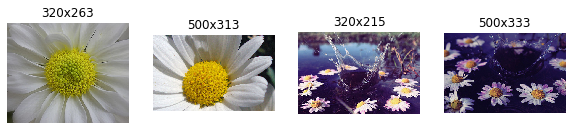

Class: dandelion


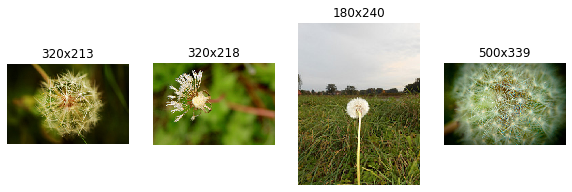

Class: roses


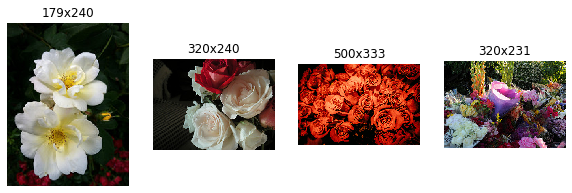

Class: sunflowers


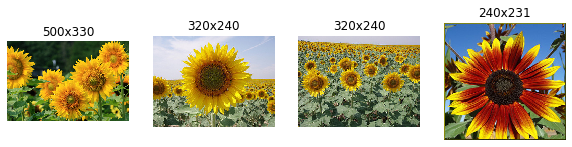

Class: tulips


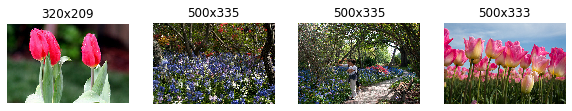

In [12]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

n_examples_per_class = 4

for flower_class in flower_classes:
    print("Class:", flower_class)
    plt.figure(figsize=(10,5))
    for index, example_image_path in enumerate(image_paths[flower_class][:n_examples_per_class]):
        example_image = mpimg.imread(example_image_path)[:,:,:channels]
        plt.subplot(100+ n_examples_per_class * 10 + index + 1)
        plt.title("{}x{}".format(example_image.shape[1], example_image.shape[0]))
        plt.imshow(example_image)
        plt.axis("off")
    plt.show()


### Preprocessing step for cropping images to 299 x 299

In [34]:
from skimage.transform import resize

def prepare_image(image,target_width=299,target_height=299, max_zoom=0.2,training=True):
    height = image.shape[0]
    width = image.shape[1]
    image_ratio = width/height
    target_image_ratio = target_width / target_height
    crop_vertically = image_ratio < target_image_ratio
    crop_width = width if crop_vertically else int(height * target_image_ratio )
    crop_height = int(width / target_image_ratio) if crop_vertically else height
    
    # shrinking this bounding box by a random factor
    # between 1.0 and 1.0 + `max_zoom`
    resize_factor = np.random.rand() * max_zoom + 1.0
    crop_width = int(crop_width / resize_factor)
    crop_height = int(crop_height / resize_factor)
    
    # selecting a random location on image 
    # for this bounding box
    if(training):
        x0 = np.random.randint(0, width - crop_width)
        y0 = np.random.randint(0, height - crop_height)
        x1 = x0 + crop_width
        y1 = y0 + crop_height
    else:
        x0 = int(width/2 - ((crop_width)/2))
        y0 = int(height/2 - ((crop_height)/2))
        x1 = x0 + crop_width
        y1 = y0 + crop_height
        #print(x0, y0, x1, y1)
    
    # Lets crop the image using random bounding box we built
    image = image[y0:y1, x0:x1]
        
    # Lets also flip the image horizontally with 50 percent
    # probability
    if (training):
        if np.random.rand() < 0.5:
            image = np.fliplr(image)
    
    # now lets resize the image to the target dimensions
    # the resize function of the scikit image will automatically
    # convert the functon into float between 0.0 and 0.1
    image = resize(image, (target_width, target_height))
    
    # finally lets ensure that the colors are represented as 32 bit floats
    return image.astype(np.float32)

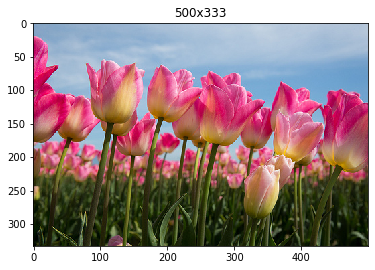

In [14]:
plt.figure(figsize=(6,8))
plt.imshow(example_image)
plt.title("{}x{}".format(example_image.shape[1], example_image.shape[0]))
plt.show()

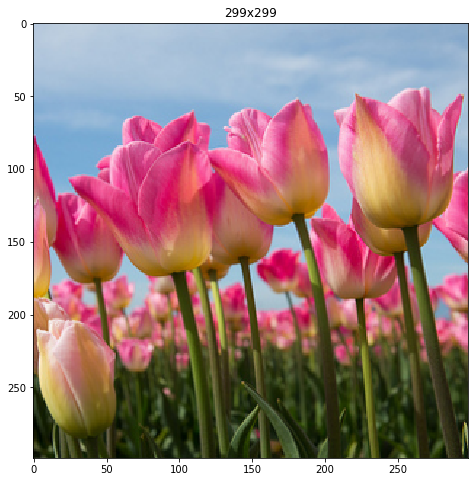

In [33]:
import numpy as np
prepared_image = prepare_image(example_image, training=True)

plt.figure(figsize=(8,8))
plt.imshow(prepared_image)
plt.title("{}x{}".format(prepared_image.shape[1], prepared_image.shape[0]))
plt.show()

92 9 407 324
(299, 299, 3)


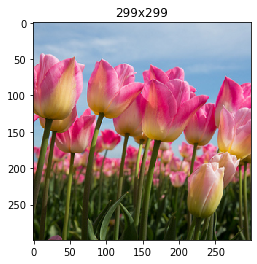

In [31]:
# looking at a test image
prepared_test_image = prepare_image(example_image,training=False)

plt.imshow(prepared_test_image)
print(prepared_test_image.shape)
plt.title("{}x{}".format(prepared_test_image.shape[1], prepared_test_image.shape[0]))
plt.show()

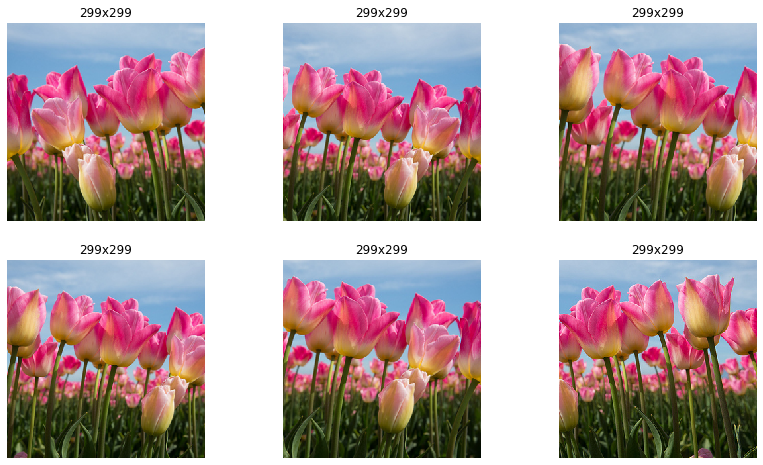

In [36]:
# looking at some of the random figures generated from same original image
rows, cols = 2, 3

plt.figure(figsize=(14, 8))
for row in range(rows):
    for col in range(cols):
        prepared_image = prepare_image(example_image)
        plt.subplot(rows, cols, row * cols + col + 1)
        plt.title("{}x{}".format(prepared_image.shape[1], prepared_image.shape[0]))
        plt.imshow(prepared_image)
        plt.axis("off")
plt.show()

In [37]:
# it is possible to implement the image
# preprocessing step directly through tensorflow

def prepare_image_with_tensorflow(image, target_width= 299, target_height=299, max_zoom =0.2 ):
    image_shape = tf.cast(tf.shape(image), tf.float32)
    height = image_shape[0]
    width = image_shape[1]
    image_ratio = width / height
    target_image_ratio = target_width / target_height
    crop_vertically = image_ratio < target_image_ratio
    crop_width = tf.cond(crop_vertically,
                         lambda: width,
                         lambda: height * target_image_ratio)
    crop_height = tf.cond(crop_vertically,
                          lambda: width / target_image_ratio,
                          lambda: height)
    
    # lets shrink thisbounding box by a random factor
    # between 1.0 and 1.0 + `max_zoom`
    resize_factor = tf.random_uniform(shape=[], minval=1.0, maxval=1.0 + max_zoom)
    
    crop_width = tf.cast(crop_width/ resize_factor, tf.int32)
    crop_height = tf.cast(crop_height/ resize_factor, tf.int32)
    box_size = tf.stack([crop_height, crop_width , 3])
    
    # lets crop the image using a random bounding box of the
    # size we want
    image = tf.image.random_crop(image, box_size)
    
    # Lets also flip the image 
    image = tf.image.random_flip_left_right(image)
    
    # The resize_bilinear function requires a 4D tensor 
    # so we need to expand the dimensions first
    image_batch = tf.expand_dims(image, 0)
    
    # finally lets resize the image to arget dimesion
    # returing a float 32 tensor
    image_batch = tf.expand_dims(image, 0)
    image = image_batch[0]/255
    return image

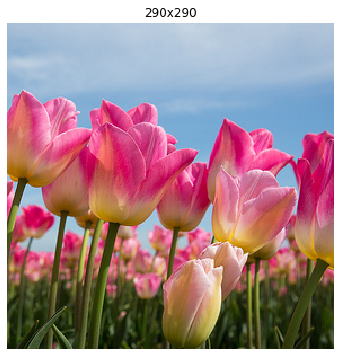

In [40]:
# testing the function
import tensorflow as tf
tf.reset_default_graph()

input_image = tf.placeholder(tf.uint8, shape=[None, None, 3])
prepared_image_op = prepare_image_with_tensorflow(input_image)

with tf.Session():
    prepared_image = prepared_image_op.eval(feed_dict={input_image: example_image})

plt.figure(figsize=(6,6))
plt.imshow(prepared_image)
plt.title("{}x{}".format(prepared_image.shape[1], prepared_image.shape[0]))
plt.axis("off")    
plt.show()

### Freezing all layers upto bottleneck layer, and replaceing the output layer wiht the approproate number of ouptus for our new classification task

In [65]:
from tensorflow.contrib.slim.nets import inception
import tensorflow.contrib.slim as slim

tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=[None, height, width, channels], name="X")
training = tf.placeholder_with_default(False, shape=[])
with slim.arg_scope(inception.inception_v3_arg_scope()):
    logits, end_points = inception.inception_v3(X,num_classes=1001, is_training=training)

inception_saver = tf.train.Saver()

In [66]:

# now we need to find whereexactly we need to add a new output layer
# we can explore the output layers inputs
logits.op.inputs[0]
# output layer adding biases

<tf.Tensor 'InceptionV3/Logits/Conv2d_1c_1x1/BiasAdd:0' shape=(?, 1, 1, 1001) dtype=float32>

In [67]:
# Thats part of the output layer
# lets start walkingbackwards in the graph

logits.op.inputs[0].op.inputs[0]
# final layer in inception layer

<tf.Tensor 'InceptionV3/Logits/Conv2d_1c_1x1/Conv2D:0' shape=(?, 1, 1, 1001) dtype=float32>

In [68]:
# again walking backwards
logits.op.inputs[0].op.inputs[0].op.inputs[0]
#thsi isthe dropout layer what we want

<tf.Tensor 'InceptionV3/Logits/Dropout_1b/cond/Merge:0' shape=(?, 1, 1, 2048) dtype=float32>

In [69]:
#print(logits.__dict__)
print(logits.op.__dict__)

{'_graph': <tensorflow.python.framework.ops.Graph object at 0x0000021DFB8CD348>, '_inputs_val': <tensorflow.python.framework.ops.Operation._InputList object at 0x0000021E044BBF88>, '_id_value': 6260, '_original_op': None, '_traceback': <tensorflow_core.python._tf_stack.Stack object at 0x0000021E044B87F0>, '_device_code_locations': [], '_colocation_code_locations': {}, '_control_flow_context': None, '_c_op': <Swig Object of type 'TF_Operation *' at 0x0000021E044D64B0>, '_is_stateful': False, '_outputs': [<tf.Tensor 'InceptionV3/Logits/SpatialSqueeze:0' shape=(?, 1001) dtype=float32>]}


In [70]:
dir(logits)

['OVERLOADABLE_OPERATORS',
 '_USE_EQUALITY',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__bool__',
 '__class__',
 '__copy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmatmul__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '__xor__',
 '_as_node_def_input',
 '_as_tf_output',
 '_c_api_shape',
 '_consumers',
 '_disallow_bool_casting',
 '_d

In [71]:
end_points
# simpler way to find the endpoints

{'Conv2d_1a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_1a_3x3/Relu:0' shape=(?, 149, 149, 32) dtype=float32>,
 'Conv2d_2a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_2a_3x3/Relu:0' shape=(?, 147, 147, 32) dtype=float32>,
 'Conv2d_2b_3x3': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_2b_3x3/Relu:0' shape=(?, 147, 147, 64) dtype=float32>,
 'MaxPool_3a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/MaxPool_3a_3x3/MaxPool:0' shape=(?, 73, 73, 64) dtype=float32>,
 'Conv2d_3b_1x1': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_3b_1x1/Relu:0' shape=(?, 73, 73, 80) dtype=float32>,
 'Conv2d_4a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_4a_3x3/Relu:0' shape=(?, 71, 71, 192) dtype=float32>,
 'MaxPool_5a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/MaxPool_5a_3x3/MaxPool:0' shape=(?, 35, 35, 192) dtype=float32>,
 'Mixed_5b': <tf.Tensor 'InceptionV3/InceptionV3/Mixed_5b/concat:0' shape=(?, 35, 35, 256) dtype=float32>,
 'Mixed_5c': <tf.Tensor 'InceptionV3/InceptionV3/Mixed_5c/concat:0' shape=(?,

In [72]:
end_points["PreLogits"]

<tf.Tensor 'InceptionV3/Logits/Dropout_1b/cond/Merge:0' shape=(?, 1, 1, 2048) dtype=float32>

In [73]:
# we can drop the second and thirddimension using tf.squeeze()
prelogits = tf.squeeze(end_points["PreLogits"], axis=[1,2])

In [74]:
# we can finally add fully connected alyer on top of this layer
n_outputs = len(flower_classes)

with tf.name_scope("new_output_layer"):
    flower_logits = tf.layers.dense(prelogits, n_outputs, name="flower_logits")
    Y_proba = tf.nn.softmax(flower_logits, name="Y_proba")

In [75]:
# we nee dto add the usual bits and pieces
# 1. placeholders for targets (y)
# 2. loss function which is the cross entropy as ussual for classification task
# 3. Optimizer we use to create a training operation that will minimizethe cost fucntion
# 4. a couple operations to measure the models accuracy
# 5. finally an initialiser and a saver

# we need to provide list of variables to train optimizers minimize() fucntion

y = tf.placeholder(tf.int32, shape=[None])

with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=flower_logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    flower_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope="flower_logits")
    training_op = optimizer.minimize(loss, var_list=flower_vars)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(flower_logits,y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))

with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()
    
# we used the inception saver before the model so that we can retract
# we willuse a second saver after traininng flower 



In [76]:
[v.name for v in flower_vars]

['flower_logits/kernel:0', 'flower_logits/bias:0']

In [77]:
### Splitting to training and test set

flower_class_ids = {flower_class: index for index, flower_class in enumerate(flower_classes)}
flower_class_ids

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [78]:
# we will shuffle thedatasets as a alist of filepaths / class pairs

flower_paths_and_classes = []
for flower_class, path in image_paths.items():
    for path in paths :
        flower_paths_and_classes.append((path, flower_class_ids[flower_class]))

In [80]:
# shuffling and splitting into training and test set

test_ratio = 0.2
train_size = int(len(flower_paths_and_classes) * (1- test_ratio))
np.random.shuffle(flower_paths_and_classes)

flower_paths_and_classes_train = flower_paths_and_classes[:train_size]
flower_paths_and_classes_test = flower_paths_and_classes[train_size:]


In [82]:
# first three instances

flower_paths_and_classes_train[:3]

[('datasets\\flowers\\flower_photos\\tulips\\7166539842_43b7e02883.jpg', 0),
 ('datasets\\flowers\\flower_photos\\tulips\\15632065904_0d9caf174b.jpg', 3),
 ('datasets\\flowers\\flower_photos\\tulips\\4612075317_91eefff68c_n.jpg', 3)]

In [86]:
from random import sample

def prepare_batch(flower_paths_and_classes, batch_size):
    batch_paths_and_classes = sample(flower_paths_and_classes, batch_size)
    images = [mpimg.imread(path)[:, :, :channels] for path, labels in batch_paths_and_classes]
    prepared_images = [prepare_image(image) for image in images]
    X_batch = 2 * np.stack(prepared_images) - 1 # Inception expects colors ranging from -1 to 1
    y_batch = np.array([labels for path, labels in batch_paths_and_classes], dtype=np.int32)
    return X_batch, y_batch

In [87]:
X_batch, y_batch = prepare_batch(flower_paths_and_classes_train, batch_size=4)


In [88]:
X_batch.shape

(4, 299, 299, 3)

In [89]:
X_batch.dtype

dtype('float32')

In [91]:
y_batch.shape

(4,)

In [93]:
X_test, y_test = prepare_batch(flower_paths_and_classes_test,batch_size=len(flower_paths_and_classes_test))

In [94]:
X_test.shape

(799, 299, 299, 3)

In [97]:
INCEPTION_PATH = os.path.join("datasets", "inception")
INCEPTION_V3_CHECKPOINT_PATH = os.path.join(INCEPTION_PATH, "inception_v3.ckpt")

n_epochs = 10
batch_size = 40
n_iterations_per_epoch = len(flower_paths_and_classes_train) // batch_size

with tf.Session() as sess:
    init.run()
    inception_saver.restore(sess, INCEPTION_V3_CHECKPOINT_PATH)

    for epoch in range(n_epochs):
        print("Epoch", epoch, end="")
        for iteration in range(n_iterations_per_epoch):
            print(".", end="")
            X_batch, y_batch = prepare_batch(flower_paths_and_classes_train, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch, training: True})

        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        print("  Last batch accuracy:", acc_batch)

        save_path = saver.save(sess, "./my_flowers_model")

Epoch 0...............................................................................  Last batch accuracy: 0.175
Epoch 1...............................................................................  Last batch accuracy: 0.2
Epoch 2...............................................................................  Last batch accuracy: 0.2
Epoch 3...............................................................................  Last batch accuracy: 0.3
Epoch 4...............................................................................  Last batch accuracy: 0.225
Epoch 5...............................................................................  Last batch accuracy: 0.1
Epoch 6...............................................................................  Last batch accuracy: 0.2
Epoch 7...............................................................................  Last batch accuracy: 0.275
Epoch 8...............................................................................  La

In [99]:
n_test_batches = 10
X_test_batches = np.array_split(X_test, n_test_batches)
y_test_batches = np.array_split(y_test, n_test_batches)

with tf.Session() as sess:
    saver.restore(sess, "./my_flowers_model")
    
    print("Final accuracy. Might take a while. ")
    acc_test = np.mean([
        accuracy.eval(feed_dict={X: X_test_batch, y:y_test_batch})
        for X_test_batch, y_test_batch in zip(X_test_batches, y_test_batches)
    ])
    
    print("Test accuracy: ", acc_test)

# the accuracy can be improved by early stopping and other stuff check online

Final accuracy. Might take a while. 
Test accuracy:  0.15518987
